외부모듈 로드 및 data 수집 정리

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x= t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)

모델생성 및 학습방식 결정

In [2]:
m1=keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))#784
m1.add(keras.layers.Dense(100,activation='relu'))#100
m1.add(keras.layers.Dense(300,activation='relu'))#300
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

m2=keras.Sequential()
m2.add(keras.layers.Flatten(input_shape=(28,28)))#784
m2.add(keras.layers.Dense(300,activation='relu'))#300
m2.add(keras.layers.Dense(100,activation='relu'))#100
m2.add(keras.layers.Dense(10,activation='softmax'))
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

m3=keras.Sequential()
m3.add(keras.layers.Flatten(input_shape=(28,28)))
m3.add(keras.layers.Dense(300,activation='relu'))
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

모델 학습

In [3]:
history1=m1.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))
history2=m2.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))
history3=m3.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 13s 7ms/step - loss: 0.5014 - accuracy: 0.8210 - val_loss: 0.4237 - val_accuracy: 0.8427
Epoch 2/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3718 - accuracy: 0.8629 - val_loss: 0.3693 - val_accuracy: 0.8723
Epoch 3/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3348 - accuracy: 0.8771 - val_loss: 0.3837 - val_accuracy: 0.8650
Epoch 4/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3138 - accuracy: 0.8846 - val_loss: 0.3287 - val_accuracy: 0.8819
Epoch 5/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2914 - accuracy: 0.8931 - val_loss: 0.3285 - val_accuracy: 0.8784
Epoch 6/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2784 - accuracy: 0.8950 - val_loss: 0.3164 - val_accuracy: 0.8853
Epoch 7/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2649 - accuracy: 0.9006 - val_loss: 0.3198 - val_acc

1500/1500 [==============================] - 4s 2ms/step - loss: 0.1335 - accuracy: 0.9492 - val_loss: 0.4417 - val_accuracy: 0.8899
Epoch 28/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9497 - val_loss: 0.4288 - val_accuracy: 0.8928
Epoch 29/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1286 - accuracy: 0.9508 - val_loss: 0.4002 - val_accuracy: 0.8932
Epoch 30/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9520 - val_loss: 0.4441 - val_accuracy: 0.8909
Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7386 - accuracy: 0.7585 - val_loss: 0.5399 - val_accuracy: 0.8133
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8272 - val_loss: 0.4720 - val_accuracy: 0.8332
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4535 - accuracy: 0.8423 - val_loss: 0.4371 - val_accuracy: 0.8457


시각화

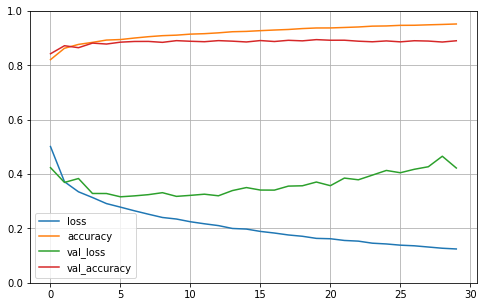

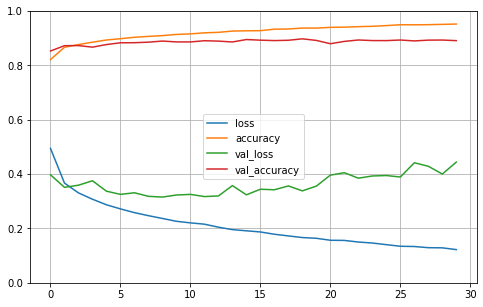

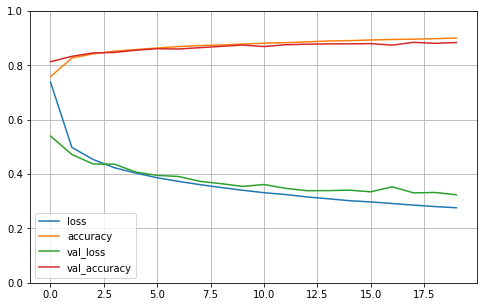

In [4]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
    
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

테스트 검증

In [5]:
m1.evaluate(s_tt_x,tt_y),m2.evaluate(s_tt_x,tt_y),m3.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8754


([0.469424307346344, 0.8902000188827515],
 [0.5168681144714355, 0.8847000002861023],
 [0.3469190299510956, 0.8754000067710876])

In [6]:
m4 = keras.Sequential()
m4.add(keras.layers.Flatten(input_shape = (28, 28)))
m4.add(keras.layers.Dense(50, activation = 'relu'))
m4.add(keras.layers.Dense(40, activation = 'relu'))
m4.add(keras.layers.Dense(10, activation = 'relu'))
m4.add(keras.layers.Dense(10, activation = 'softmax'))
m4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 40)                2040      
                                                                 
 dense_11 (Dense)            (None, 10)                410       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
m4.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history4 = m4.fit(t_x, t_y, epochs = 40, validation_data = (v_x, v_y))

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1019 - accuracy: 0.6284 - val_loss: 0.6530 - val_accuracy: 0.7626
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5647 - accuracy: 0.8021 - val_loss: 0.5160 - val_accuracy: 0.8183
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4976 - accuracy: 0.8267 - val_loss: 0.5202 - val_accuracy: 0.8160
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4633 - accuracy: 0.8389 - val_loss: 0.4644 - val_accuracy: 0.8372
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.8471 - val_loss: 0.4334 - val_accuracy: 0.8488
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4209 - accuracy: 0.8529 - val_loss: 0.4305 - val_accuracy: 0.8487
Epoch 7/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4064 - accuracy: 0.8579 - val_loss: 0.4051 - val_accuracy:

(0.0, 1.0)

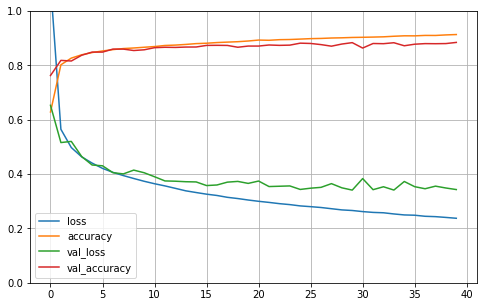

In [8]:
pd.DataFrame(history4.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

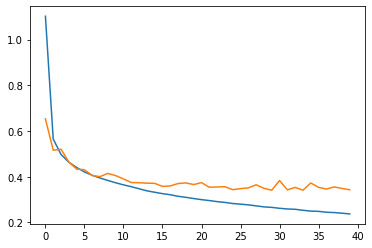

In [9]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

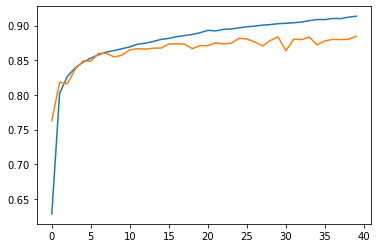

In [10]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])